In [2]:
import sys
print(sys.path)

['/opt/homebrew/Cellar/python@3.12/3.12.7_1/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/opt/homebrew/Cellar/python@3.12/3.12.7_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/opt/homebrew/Cellar/python@3.12/3.12.7_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/josephobukofe/Library/Caches/pypoetry/virtualenvs/user-performance-classification-ngCtwbCC-py3.12/lib/python3.12/site-packages', '/Users/josephobukofe/Downloads/user_performance_classification']


In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE, trustworthiness
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import KBinsDiscretizer


In [4]:
capitalize_and_replace = lambda s, delimiter: ' '.join(word.capitalize() for word in s.split(delimiter))

In [5]:
df = pd.read_csv("/Users/josephobukofe/Downloads/user_performance_classification/classification_data.csv")
df

,user_id,label,Account type,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Savings type,Length of current employment,Instalment per cent,...,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,586266,1,1,18,4,2,1049,1,2,4,...,4,2,21,3,1,1,3,1,1,1
1,392565,1,1,9,4,0,2799,1,3,2,...,2,1,36,3,1,2,3,2,1,1
2,204665,1,2,12,2,9,841,2,4,2,...,4,1,23,3,1,1,2,1,1,1
3,393307,1,1,12,4,0,2122,1,3,3,...,2,1,39,3,1,2,2,2,1,2
4,627375,1,1,12,4,0,2171,1,3,4,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,355104,0,1,24,2,3,1987,1,3,2,...,4,1,21,3,1,1,2,2,1,1
996,407505,0,1,24,2,0,2303,1,5,4,...,1,1,45,3,2,1,3,1,1,1
997,115061,0,4,21,4,0,12680,5,5,4,...,4,4,30,3,3,1,4,1,2,1
998,283292,0,2,12,2,3,6468,5,1,2,...,1,4,52,3,2,1,4,1,2,1


# Data Investigation

Investigating the shape of the dataset

In [6]:
df.shape

(1000, 22)

Investigating the data types of the features in the dataset

In [7]:
df.dtypes

user_id                              int64
label                                int64
Account type                         int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    int64
Purpose                              int64
Credit Amount                        int64
Savings type                         int64
Length of current employment         int64
Instalment per cent                  int64
Marital Status                       int64
Guarantors                           int64
Duration in Current address          int64
Most valuable available asset        int64
Age                                  int64
Concurrent Credits                   int64
Type of apartment                    int64
No of Credits at this Bank           int64
Occupation                           int64
No of dependents                     int64
Telephone                            int64
Foreign Worker                       int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   user_id                            1000 non-null   int64
 1   label                              1000 non-null   int64
 2   Account type                       1000 non-null   int64
 3   Duration of Credit (month)         1000 non-null   int64
 4   Payment Status of Previous Credit  1000 non-null   int64
 5   Purpose                            1000 non-null   int64
 6   Credit Amount                      1000 non-null   int64
 7   Savings type                       1000 non-null   int64
 8   Length of current employment       1000 non-null   int64
 9   Instalment per cent                1000 non-null   int64
 10  Marital Status                     1000 non-null   int64
 11  Guarantors                         1000 non-null   int64
 12  Duration in Current a

Investigating the number of null values

In [9]:
df.isnull().sum()

user_id                              0
label                                0
Account type                         0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Savings type                         0
Length of current employment         0
Instalment per cent                  0
Marital Status                       0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age                                  0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

Determining the cardinality (number of unique values) for all features

In [10]:
df.nunique().sort_values(ascending=False)

user_id                              1000
Credit Amount                         923
Age                                    53
Duration of Credit (month)             33
Purpose                                10
Payment Status of Previous Credit       5
Savings type                            5
Length of current employment            5
Account type                            4
Instalment per cent                     4
Marital Status                          4
Occupation                              4
Duration in Current address             4
Most valuable available asset           4
No of Credits at this Bank              4
Type of apartment                       3
Guarantors                              3
Concurrent Credits                      3
label                                   2
No of dependents                        2
Telephone                               2
Foreign Worker                          2
dtype: int64

Descriptive statistics of the dataset

In [11]:
df.describe()

,user_id,label,Account type,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Savings type,Length of current employment,Instalment per cent,...,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,396518.897000,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,225382.045777,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,505.000000,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,201780.000000,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,395127.500000,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,586323.000000,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,797738.000000,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [12]:
df_copy = df.copy()

Investigating the number of duplicated rows

In [13]:
print('Duplicated Rows: %s'%df_copy.duplicated().sum())

Duplicated Rows: 0


# Data Preprocessing

Renaming columns to a more consistent format

In [14]:
df_renamed = df_copy.rename(
    columns={
        "Credit Amount": "credit_amount",
        "Age": "age",
        "Duration of Credit (month)": "duration_of_credit_in_months",
        "Purpose": "purpose",
        "Payment Status of Previous Credit": "payment_status_of_previous_credit",
        "Savings type": "savings_type",
        "Length of current employment": "length_of_current_employment",
        "Account type": "account_type",
        "Instalment per cent": "instalment_per_cent",
        "Marital Status": "marital_status",
        "Occupation": "occupation",
        "Duration in Current address": "duration_in_current_address",
        "Most valuable available asset": "most_valuable_available_asset",
        "No of Credits at this Bank": "number_of_credits_at_this_bank",
        "Type of apartment": "apartment_type",
        "Guarantors": "number_of_guarantors",
        "Concurrent Credits": "number_of_concurrent_credits",
        "label": "loan_performance",
        "No of dependents": "number_of_dependents",
        "Telephone": "telephone",
        "Foreign Worker": "foreign_worker",
    }
)

In [15]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   user_id                            1000 non-null   int64
 1   loan_performance                   1000 non-null   int64
 2   account_type                       1000 non-null   int64
 3   duration_of_credit_in_months       1000 non-null   int64
 4   payment_status_of_previous_credit  1000 non-null   int64
 5   purpose                            1000 non-null   int64
 6   credit_amount                      1000 non-null   int64
 7   savings_type                       1000 non-null   int64
 8   length_of_current_employment       1000 non-null   int64
 9   instalment_per_cent                1000 non-null   int64
 10  marital_status                     1000 non-null   int64
 11  number_of_guarantors               1000 non-null   int64
 12  duration_in_current_a

In [16]:
target = ["loan_performance"]
continous_features = ["credit_amount"]
year_based_features = ["duration_of_credit_in_months", "age", "duration_in_current_address", "length_of_current_employment"]
categorical_features = [feature for feature in df_renamed.columns if feature not in target + continous_features + year_based_features]

In [17]:
categorical_features

['user_id',
 'account_type',
 'payment_status_of_previous_credit',
 'purpose',
 'savings_type',
 'instalment_per_cent',
 'marital_status',
 'number_of_guarantors',
 'most_valuable_available_asset',
 'number_of_concurrent_credits',
 'apartment_type',
 'number_of_credits_at_this_bank',
 'occupation',
 'number_of_dependents',
 'telephone',
 'foreign_worker']

# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Categorical Features

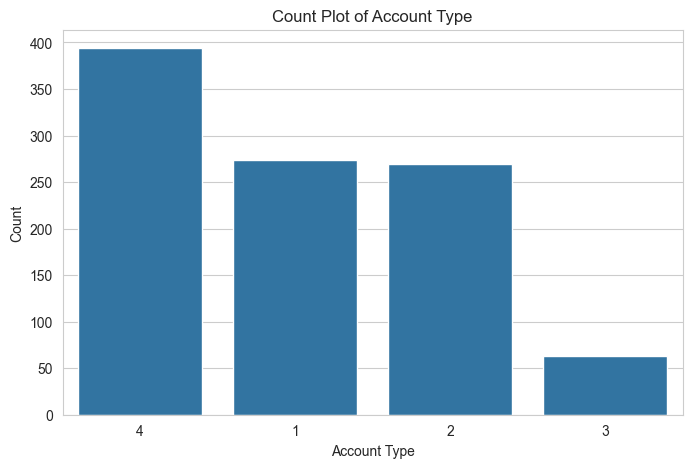

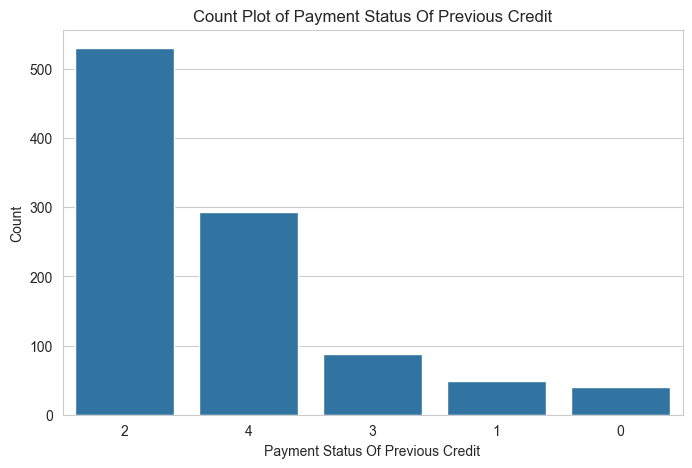

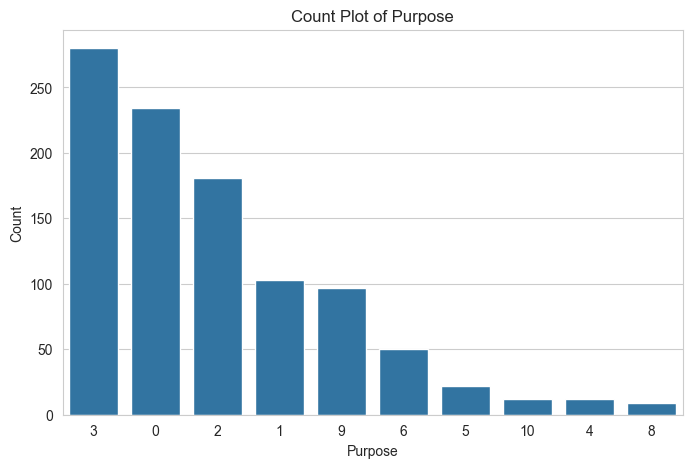

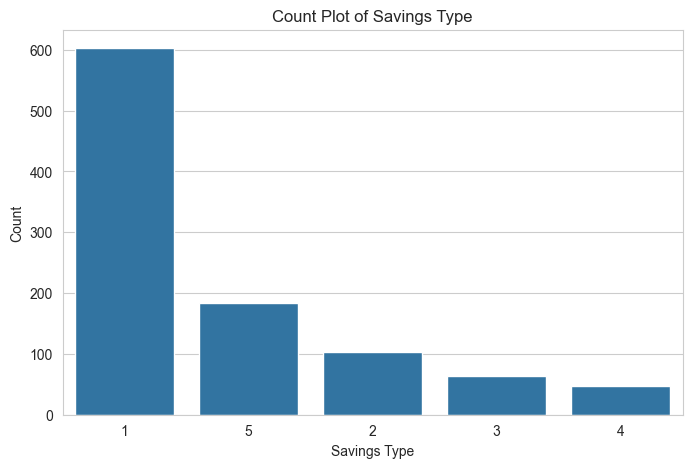

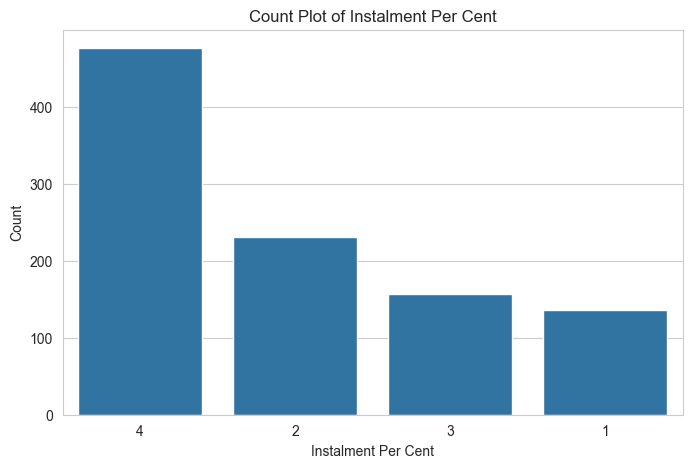

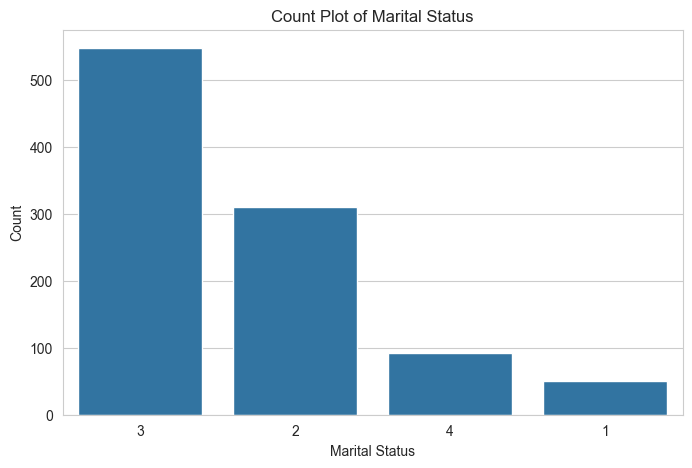

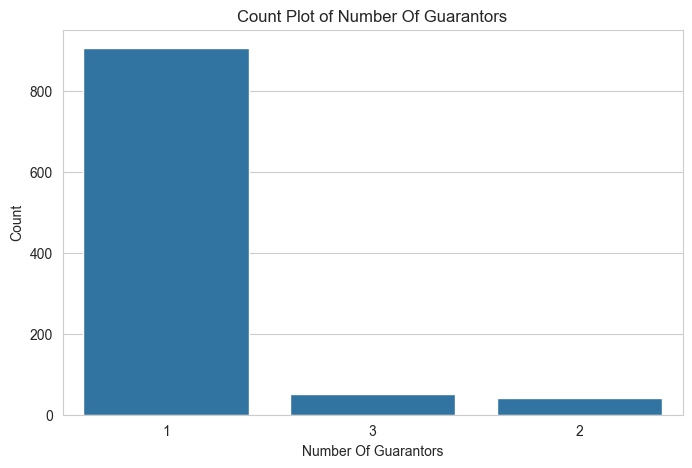

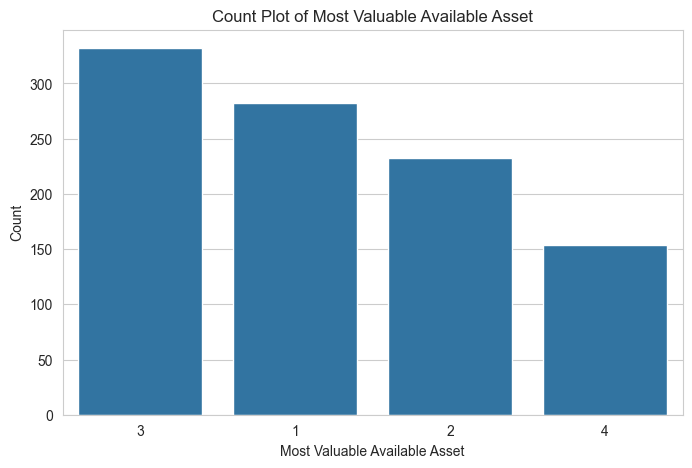

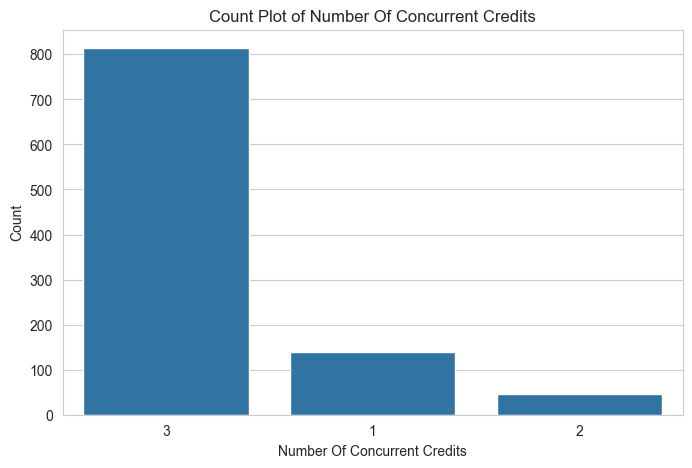

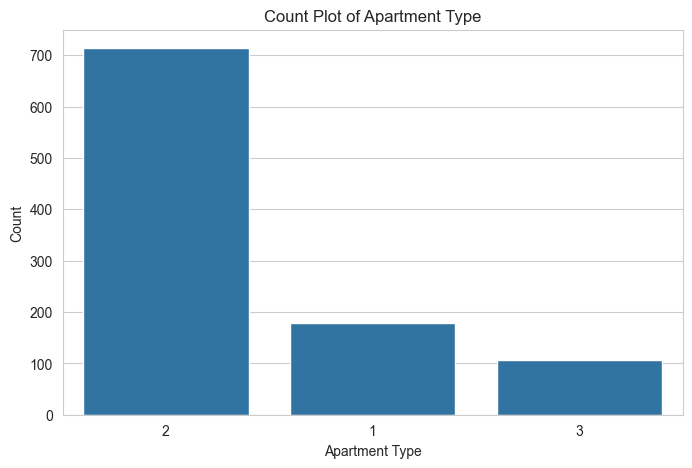

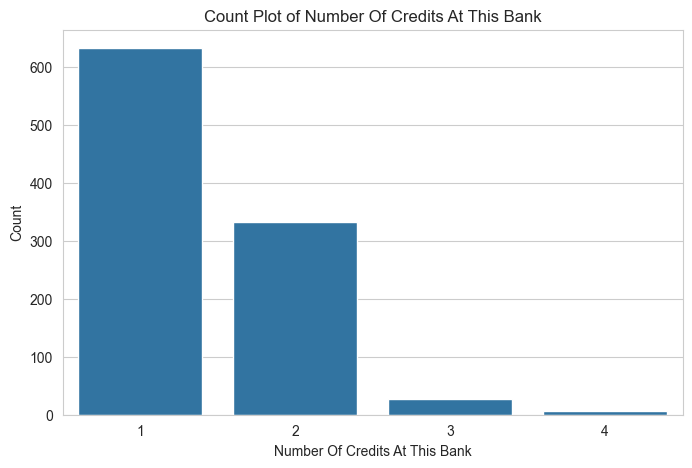

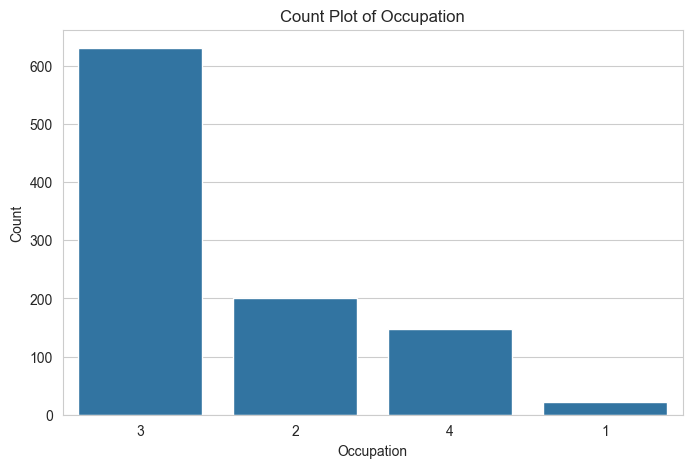

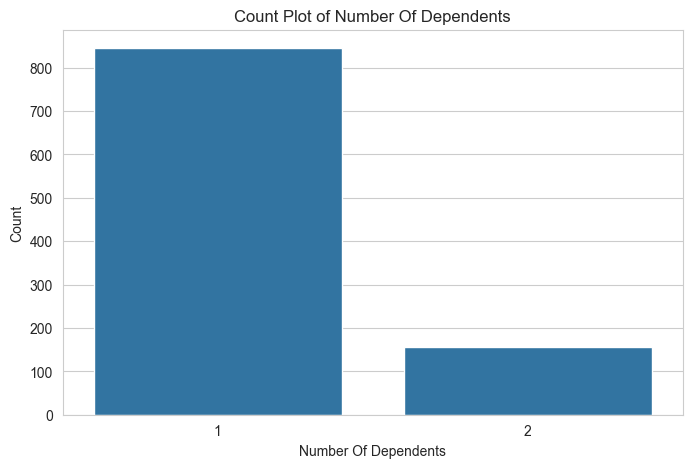

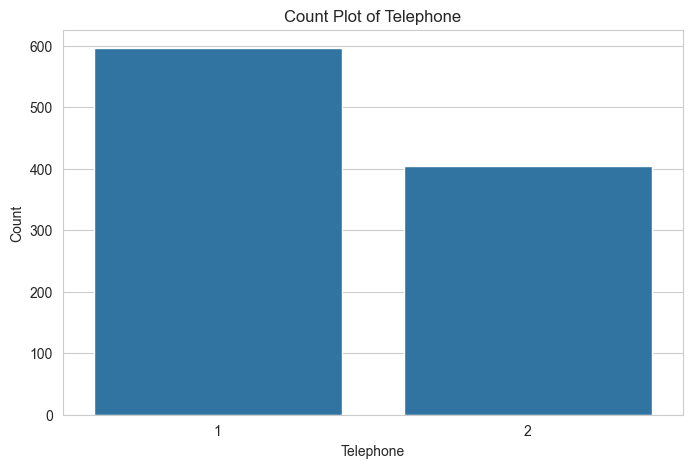

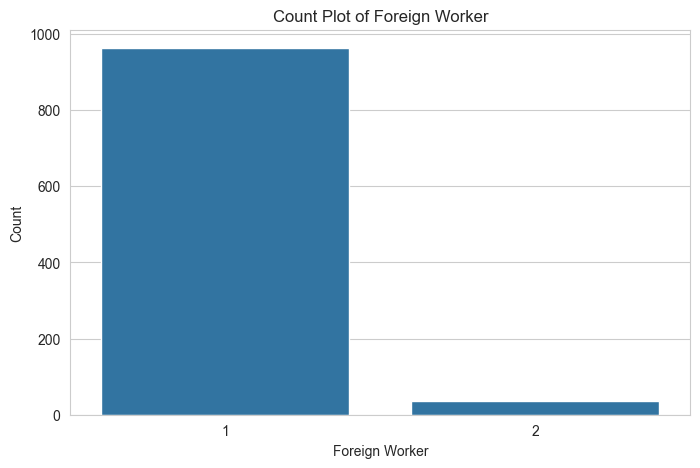

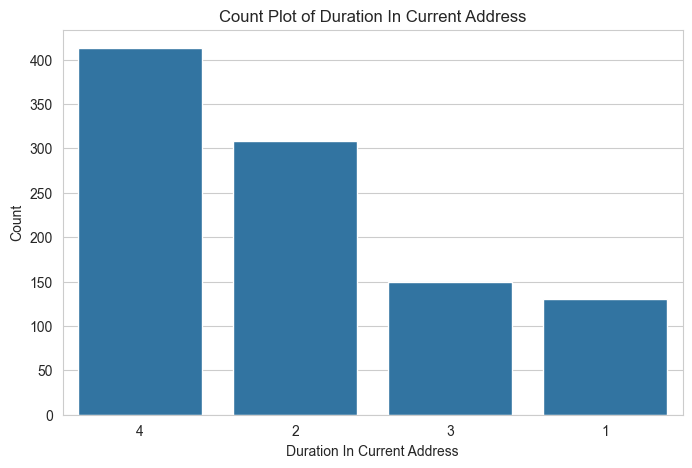

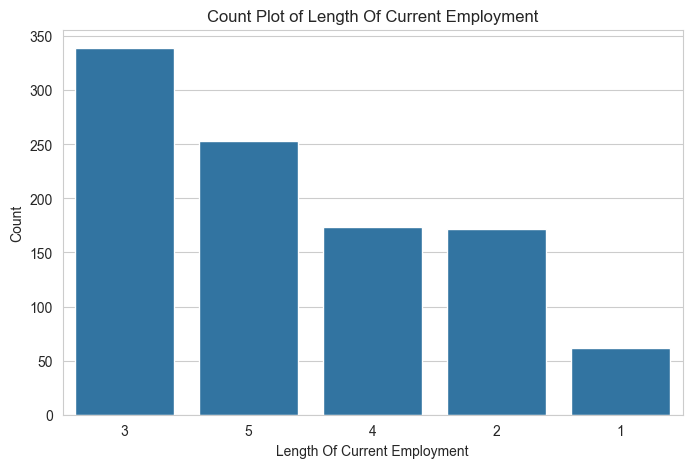

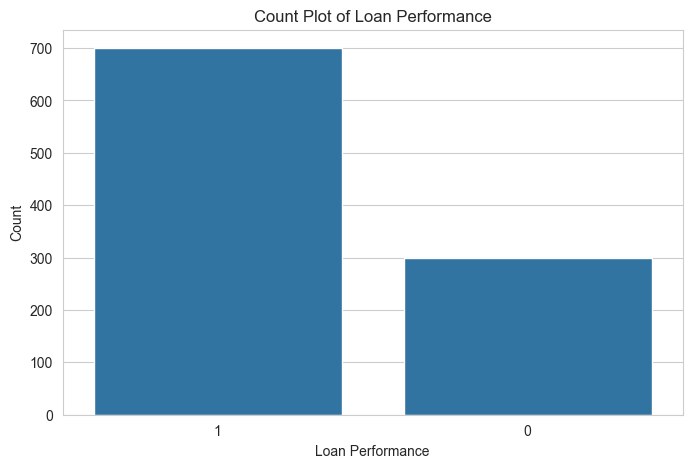

In [18]:
sns.set_style('whitegrid')
for feature in categorical_features + [
    "duration_in_current_address",
    "length_of_current_employment",
    "loan_performance",
]:
    if feature != "user_id":
        plt.figure(figsize=(8, 5))
        sns.countplot(
            x=feature,
            data=df_renamed,
            order=df_renamed[feature]
            .value_counts()
            .sort_values(ascending=False)
            .index,
        )
        plt.title(f'Count Plot of {capitalize_and_replace(feature, '_')}')
        plt.xlabel(f"{capitalize_and_replace(feature, '_')}", fontsize=10)
        plt.ylabel("Count", fontsize=10)
        plt.xticks(rotation=0)
        plt.show()


### Continuous Features

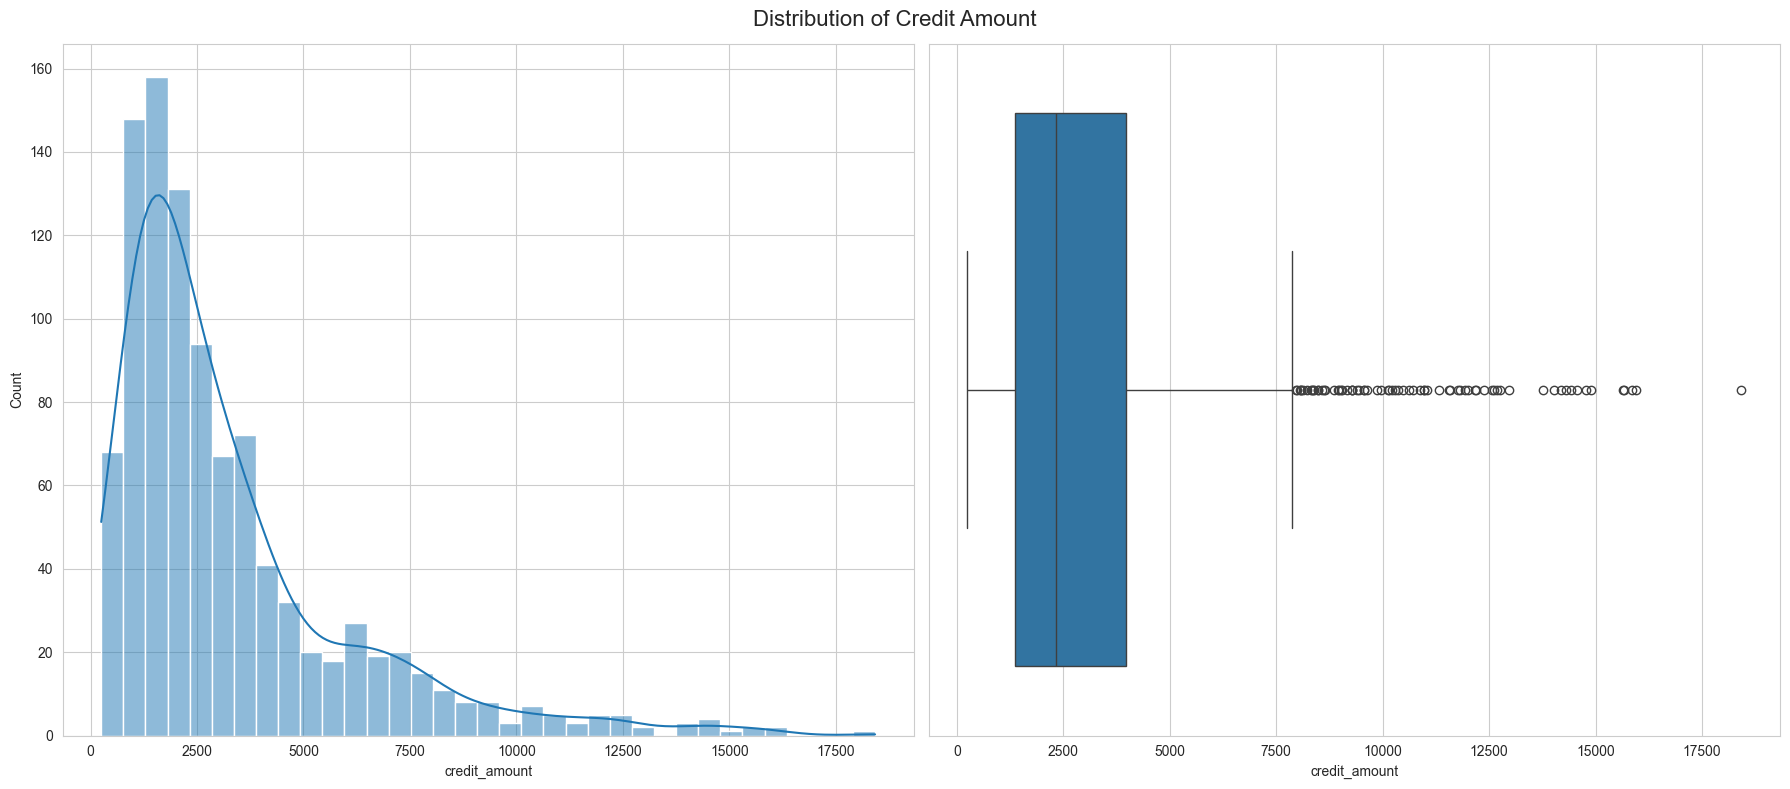

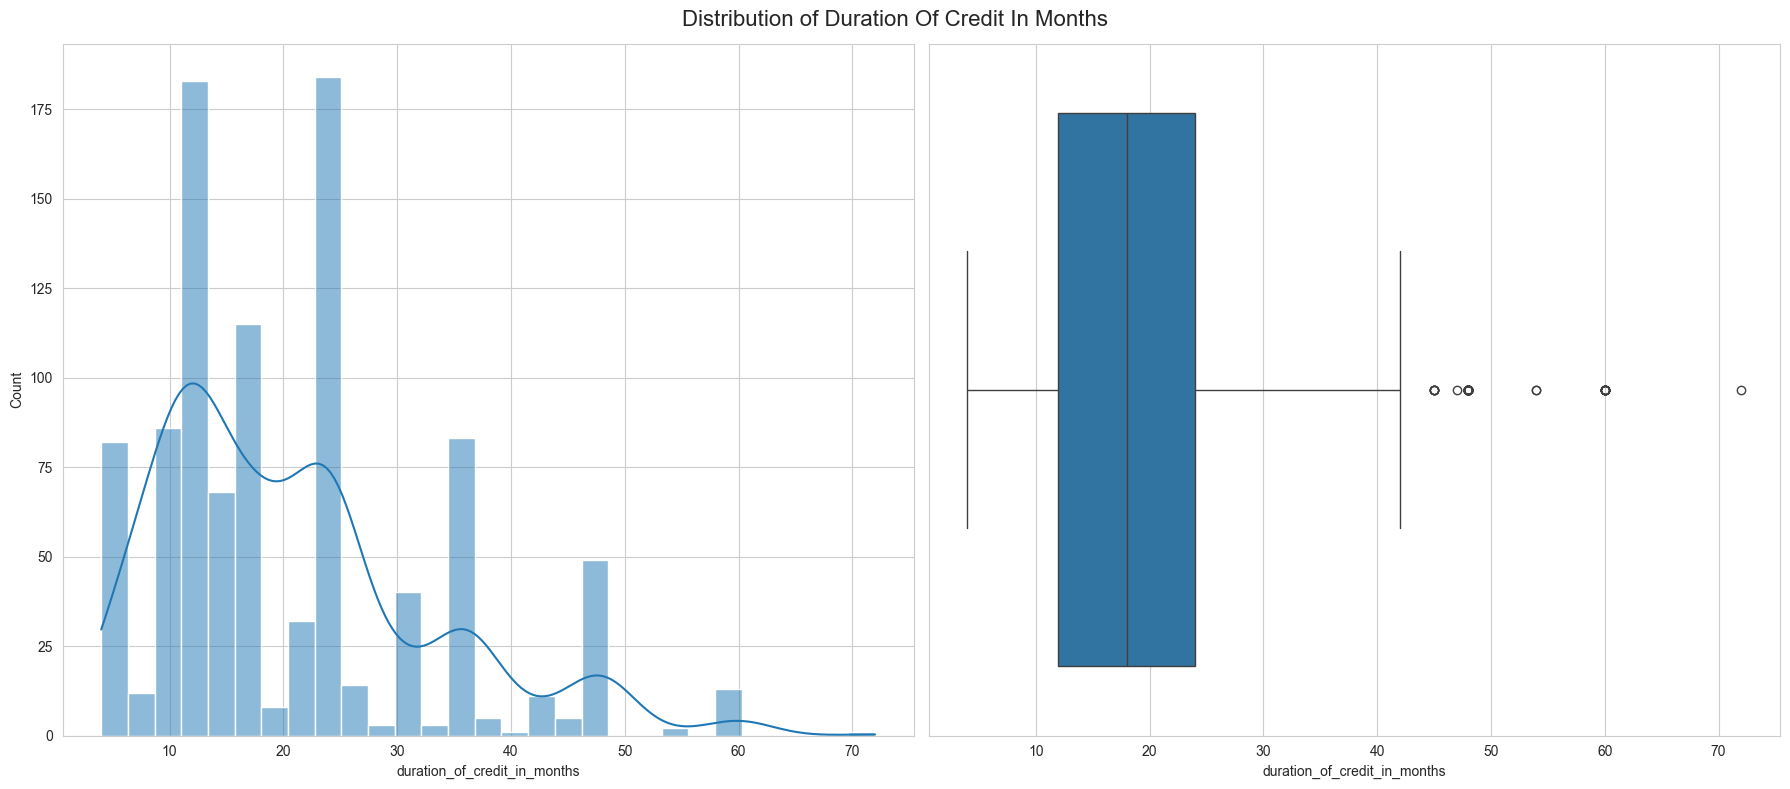

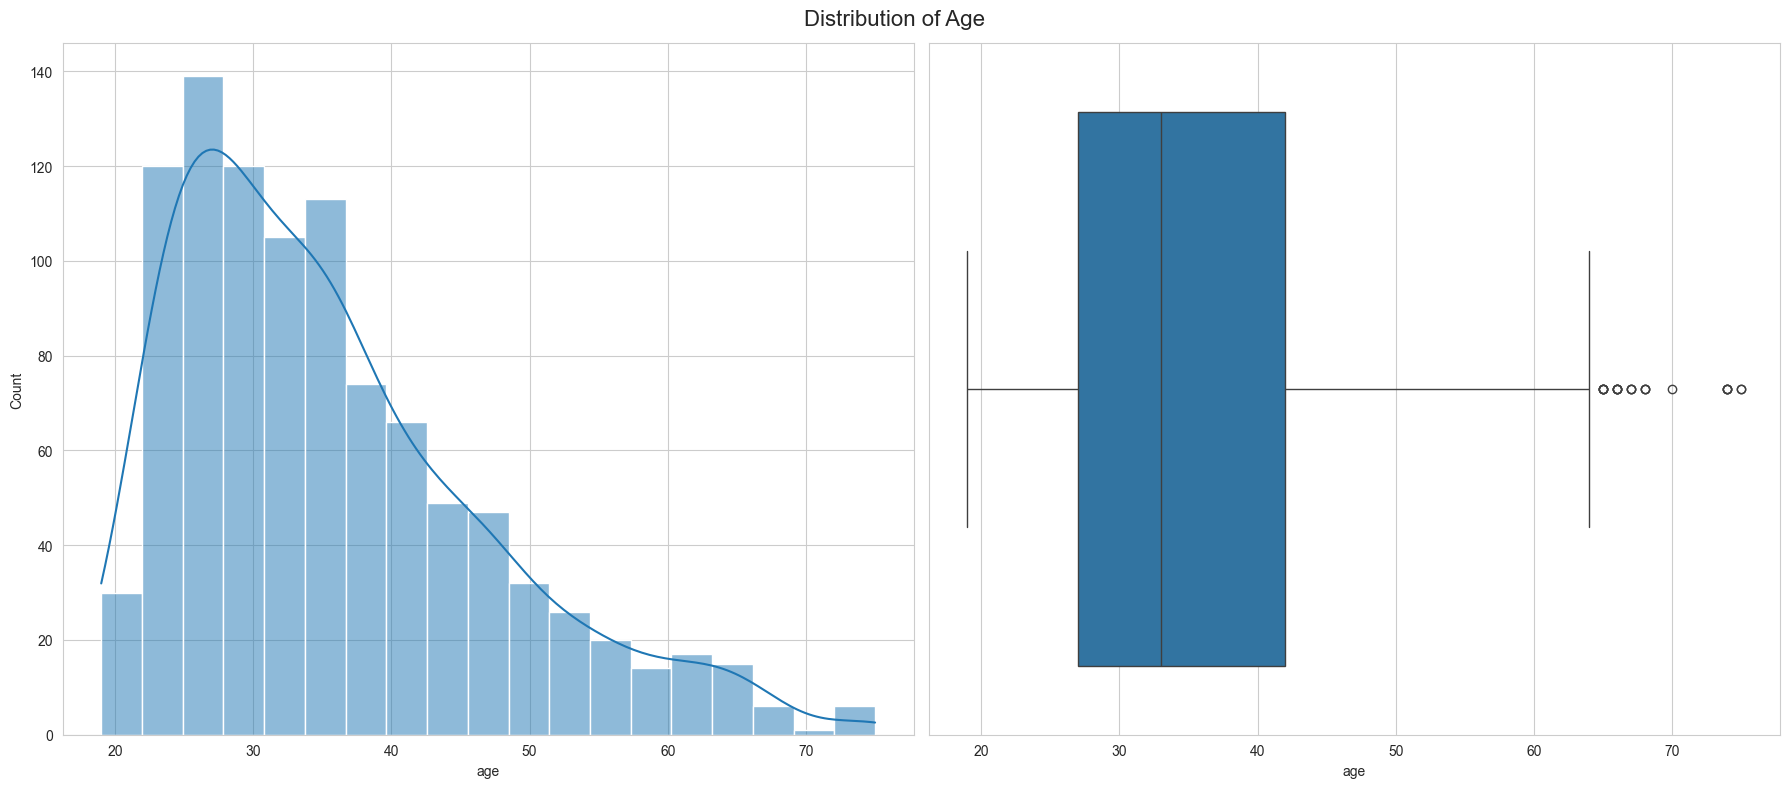

In [19]:
for feature in ["credit_amount", "duration_of_credit_in_months", "age"]:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
    fig.suptitle(f"Distribution of {capitalize_and_replace(feature, '_')}", fontsize=16)
    sns.histplot(data=df_renamed, x=feature, kde=True, ax=axes[0])
    sns.boxplot(data=df_renamed, x=feature, ax=axes[1])
    plt.tight_layout()
    plt.show()

#### Investigating for sparsity

In [20]:
zero_credit_amount_values_count = df_renamed["credit_amount"] == 0
zero_credit_amount_values_sum = zero_credit_amount_values_count.sum()
print(f"Number of zero values in Credit Amount: {zero_credit_amount_values_sum}")
print(f"Number of rows in Credit Amount: {df.shape[0]}")
print(f"Percentage of zero values in Credit Amount: {(zero_credit_amount_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values in Credit Amount: 0
Number of rows in Credit Amount: 1000
Percentage of zero values in Credit Amount: 0.00%


In [21]:
zero_duration_of_credit_in_months_values_count = df_renamed["duration_of_credit_in_months"] == 0
zero_duration_of_credit_in_months_values_sum = zero_duration_of_credit_in_months_values_count.sum()
print(f"Number of zero values in Duration of Credit (month): {zero_duration_of_credit_in_months_values_sum}")
print(f"Number of rows in Duration of Credit (month): {df.shape[0]}")
print(f"Percentage of zero values in Duration of Credit (month): {(zero_duration_of_credit_in_months_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values in Duration of Credit (month): 0
Number of rows in Duration of Credit (month): 1000
Percentage of zero values in Duration of Credit (month): 0.00%


In [22]:
zero_age_values_count = df_renamed["age"] == 0
zero_age_values_sum = zero_age_values_count.sum()
print(f"Number of zero values in Age: {zero_age_values_sum}")
print(f"Number of rows in Age: {df.shape[0]}")
print(f"Percentage of zero values in Age: {(zero_age_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values in Age: 0
Number of rows in Age: 1000
Percentage of zero values in Age: 0.00%


## Bivariate Analysis

### Categorical Features vs Target Feature (Loan Performance)

In [23]:
categorical_features

['user_id',
 'account_type',
 'payment_status_of_previous_credit',
 'purpose',
 'savings_type',
 'instalment_per_cent',
 'marital_status',
 'number_of_guarantors',
 'most_valuable_available_asset',
 'number_of_concurrent_credits',
 'apartment_type',
 'number_of_credits_at_this_bank',
 'occupation',
 'number_of_dependents',
 'telephone',
 'foreign_worker']

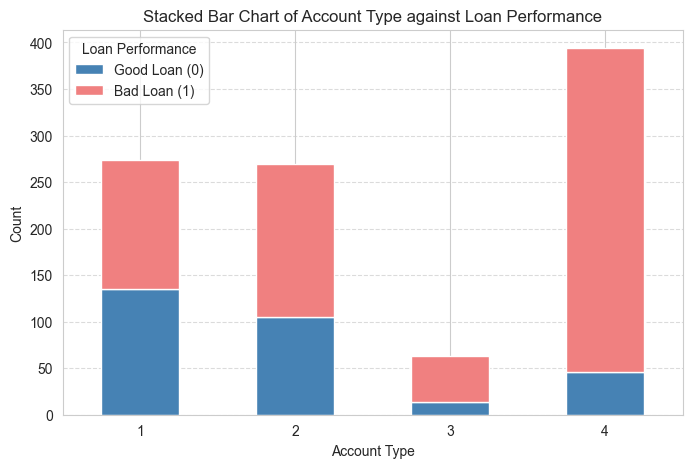

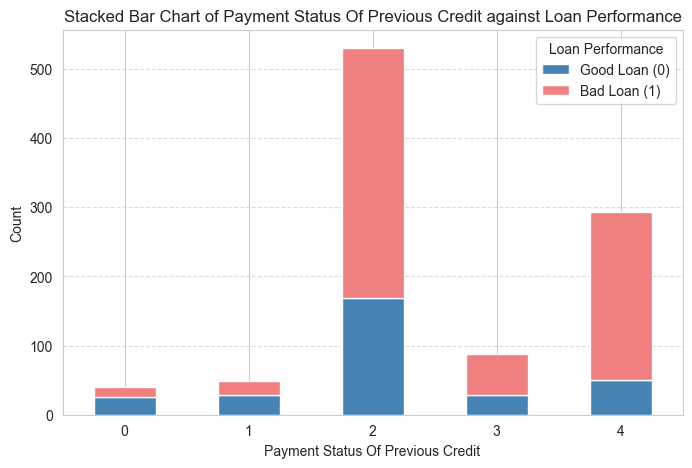

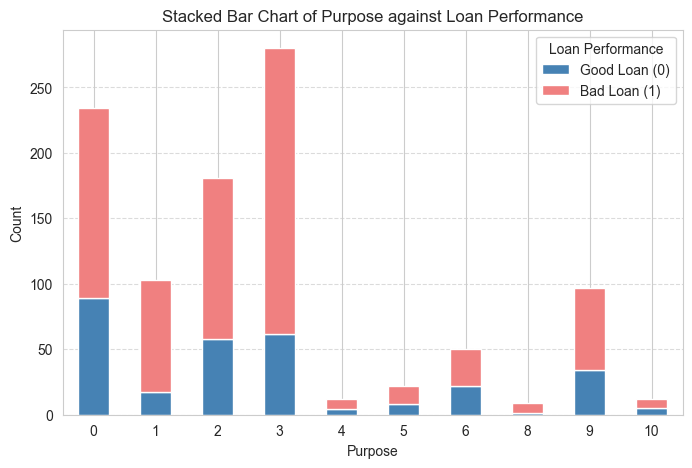

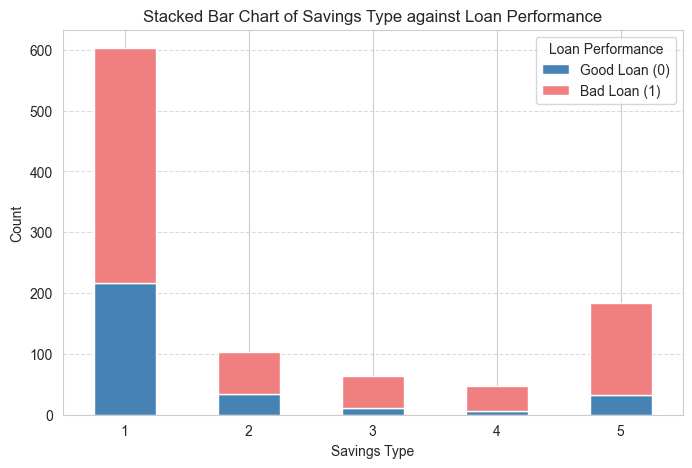

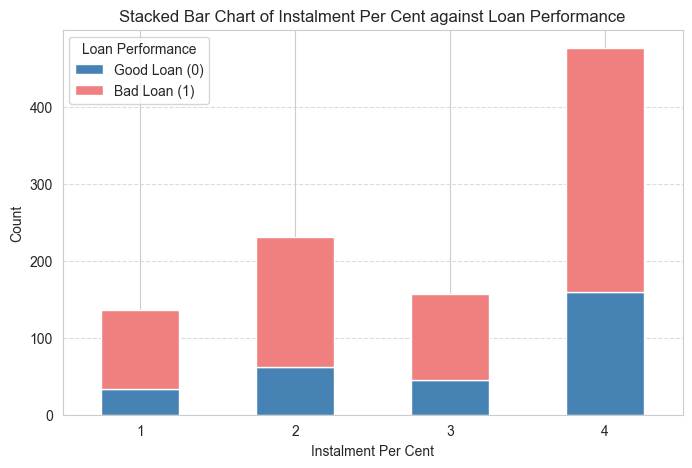

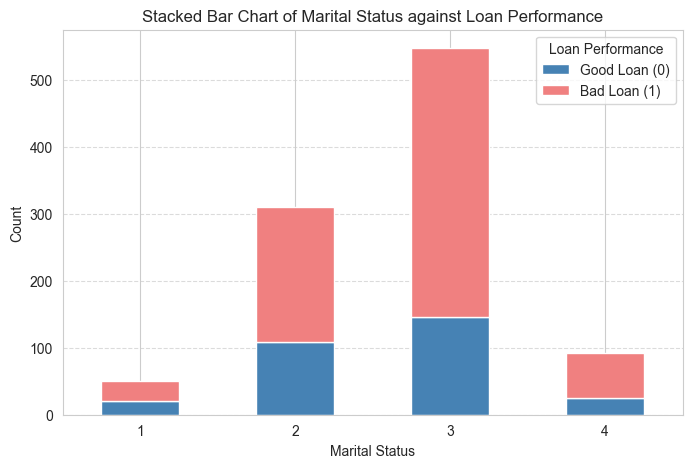

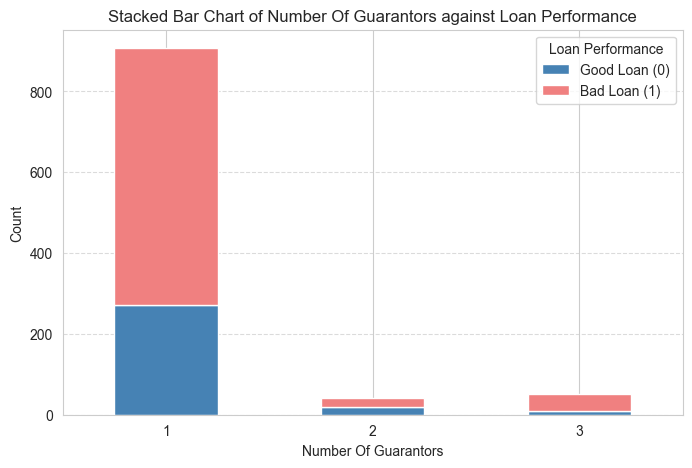

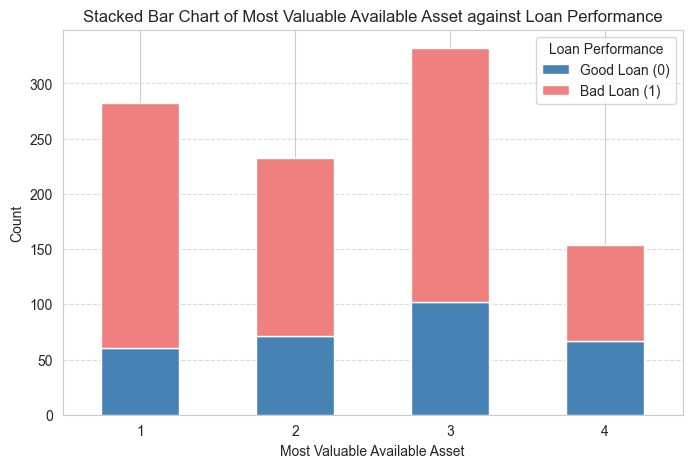

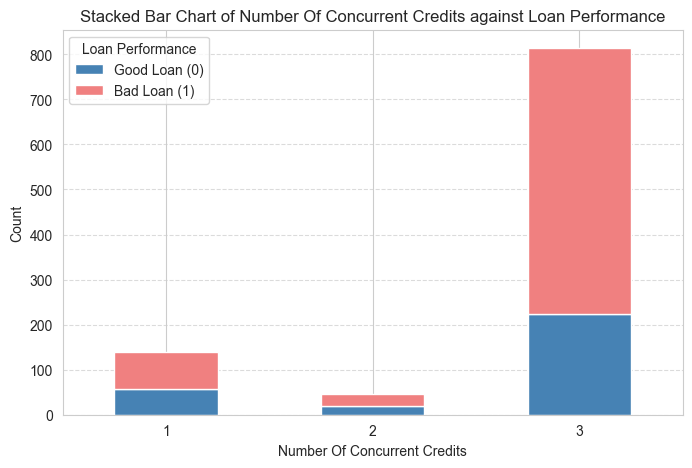

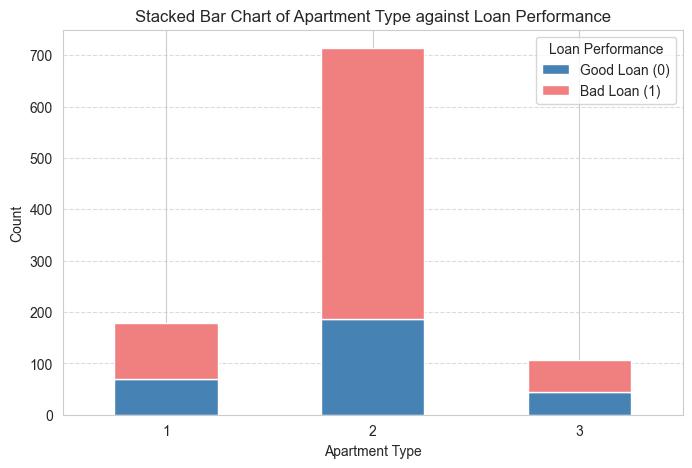

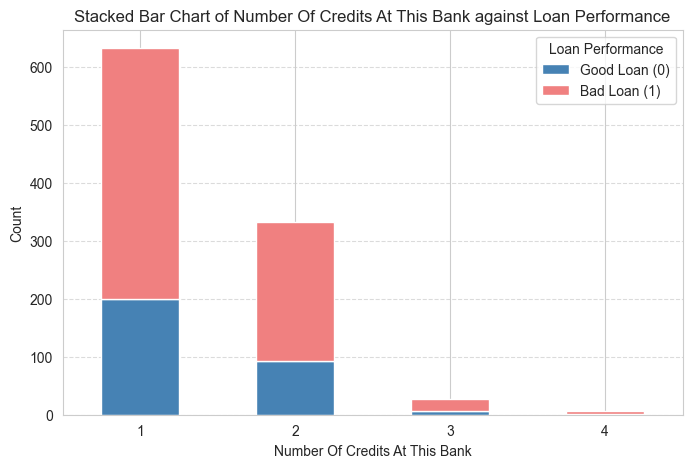

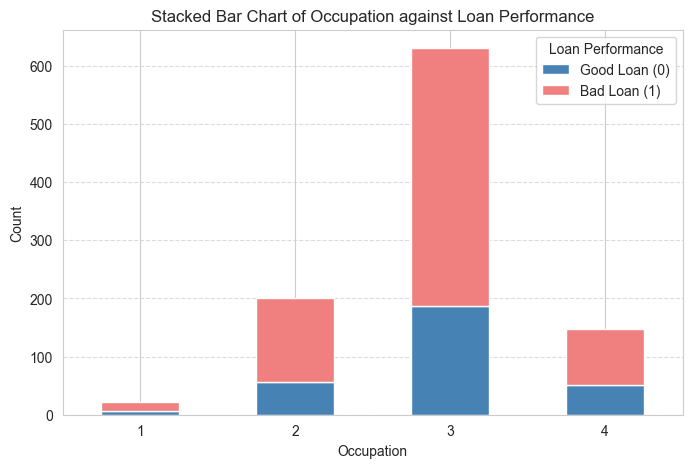

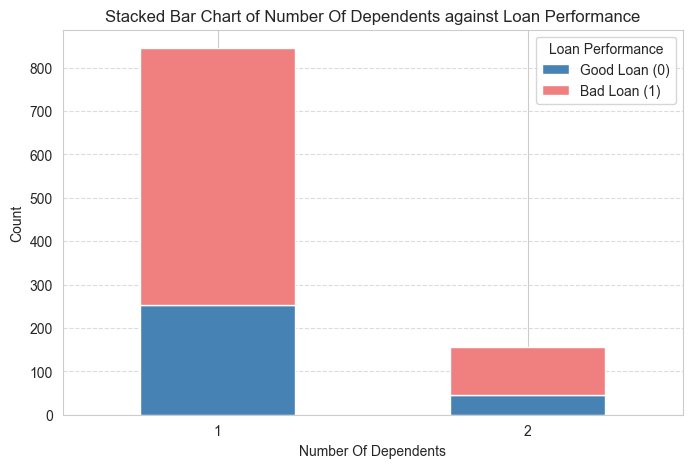

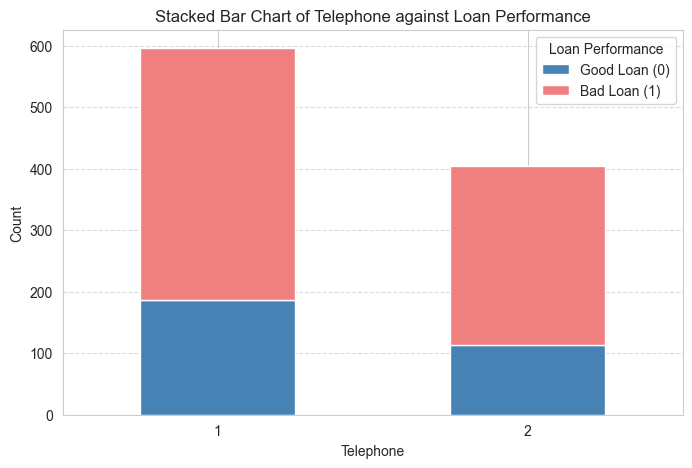

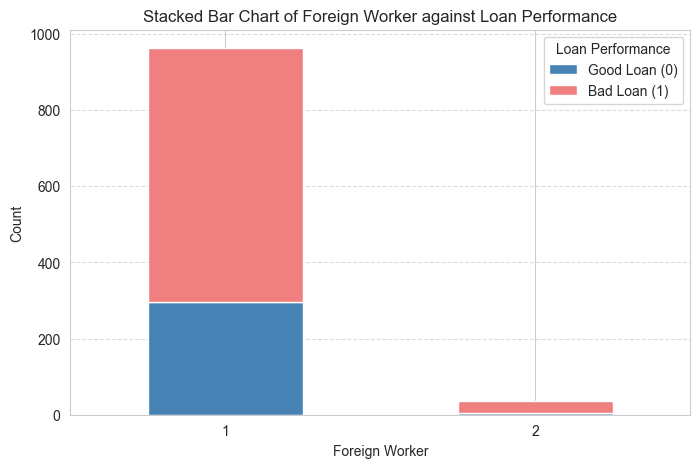

In [24]:
for feature in categorical_features:
    if feature != "user_id":
        counts = pd.crosstab(df_renamed[feature], df_renamed["loan_performance"])
        counts.plot(
            kind="bar",
            stacked=True,
            figsize=(8, 5),
            color=["#4682b4", "#f08080"],
        )
        plt.title(f"Stacked Bar Chart of {capitalize_and_replace(feature, '_')} against Loan Performance", fontsize=12)
        plt.xlabel(f"{capitalize_and_replace(feature, '_')}", fontsize=10)
        plt.ylabel("Count", fontsize=10)
        plt.legend(title="Loan Performance", labels=["Good Loan (0)", "Bad Loan (1)"])
        plt.xticks(rotation=0)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()


### Continuous Features vs Target Feature (Loan Performance)

In [51]:
df_renamed["credit_amount"].max()

np.int64(18424)

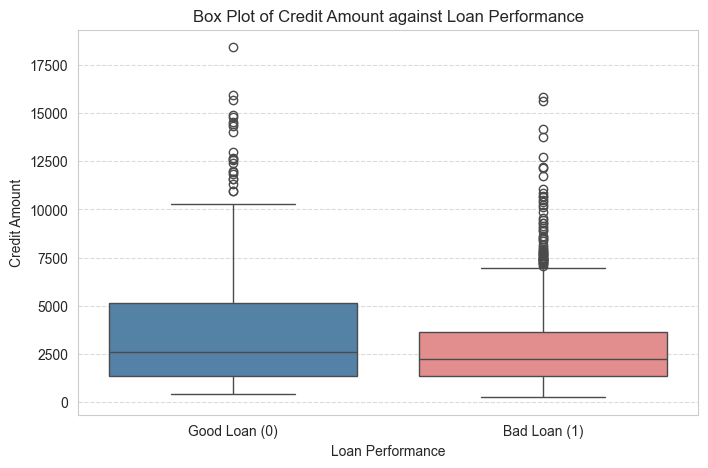

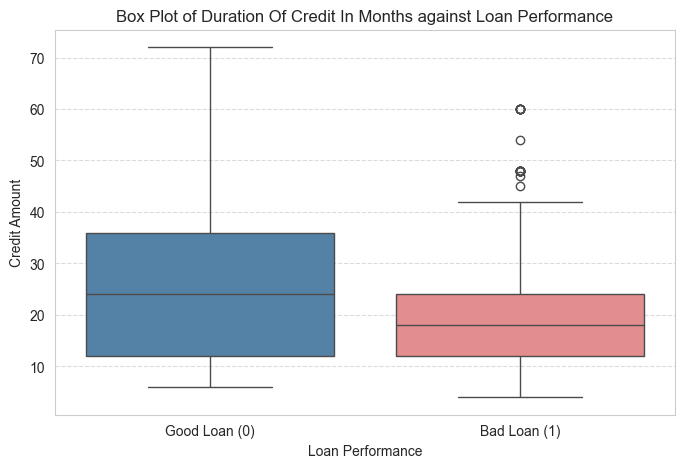

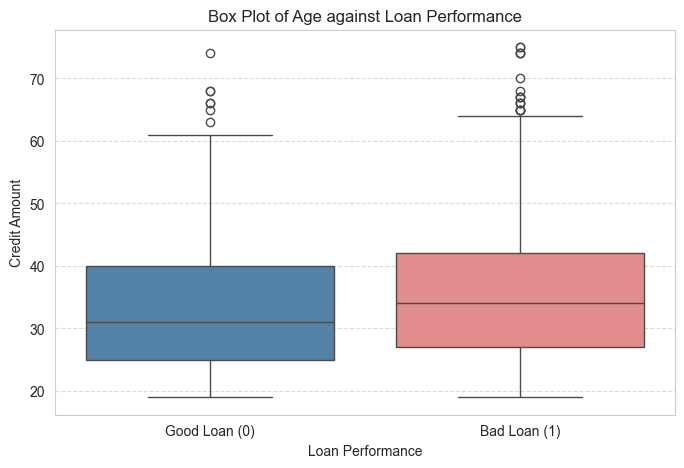

In [25]:
for feature in ["credit_amount", "duration_of_credit_in_months", "age"]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(
        data=df_renamed,
        x="loan_performance",
        y=feature,
        palette=["#4682b4", "#f08080"],
        hue="loan_performance",
        legend=False
    )

    plt.title(f"Box Plot of {capitalize_and_replace(feature, '_')} against Loan Performance", fontsize=12)
    plt.xlabel("Loan Performance", fontsize=10)
    plt.ylabel("Credit Amount", fontsize=10)
    plt.xticks([0, 1], labels=["Good Loan (0)", "Bad Loan (1)"])
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

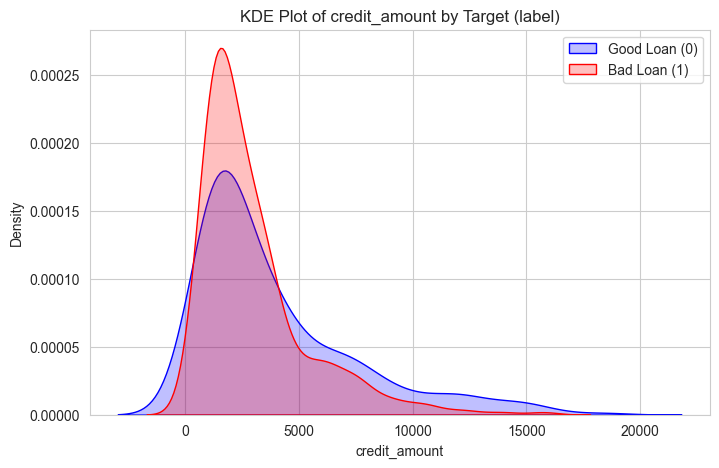

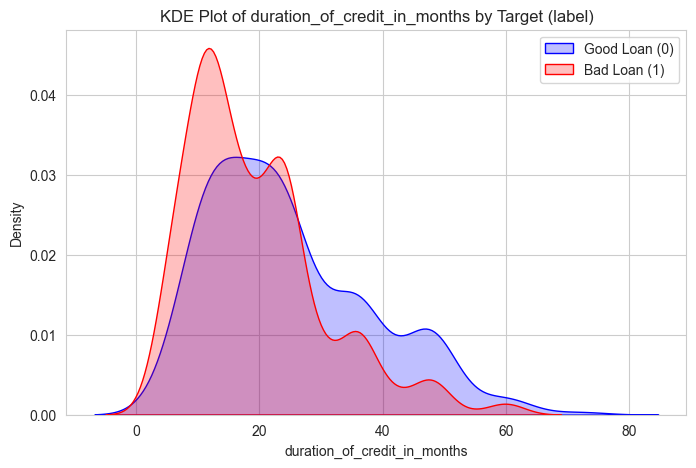

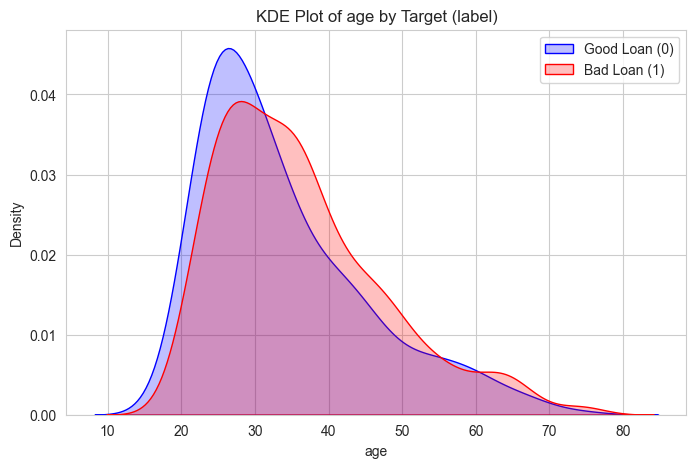

In [26]:
for feature in ["credit_amount", "duration_of_credit_in_months", "age"]:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df_renamed[df_renamed["loan_performance"] == 0][feature], label="Good Loan (0)", fill=True, color="blue")
    sns.kdeplot(data=df_renamed[df_renamed["loan_performance"] == 1][feature], label="Bad Loan (1)", fill=True, color="red")
    plt.title(f"KDE Plot of {feature} by Target (label)")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

In [27]:
df_renamed

,user_id,loan_performance,account_type,duration_of_credit_in_months,payment_status_of_previous_credit,purpose,credit_amount,savings_type,length_of_current_employment,instalment_per_cent,...,duration_in_current_address,most_valuable_available_asset,age,number_of_concurrent_credits,apartment_type,number_of_credits_at_this_bank,occupation,number_of_dependents,telephone,foreign_worker
0,586266,1,1,18,4,2,1049,1,2,4,...,4,2,21,3,1,1,3,1,1,1
1,392565,1,1,9,4,0,2799,1,3,2,...,2,1,36,3,1,2,3,2,1,1
2,204665,1,2,12,2,9,841,2,4,2,...,4,1,23,3,1,1,2,1,1,1
3,393307,1,1,12,4,0,2122,1,3,3,...,2,1,39,3,1,2,2,2,1,2
4,627375,1,1,12,4,0,2171,1,3,4,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,355104,0,1,24,2,3,1987,1,3,2,...,4,1,21,3,1,1,2,2,1,1
996,407505,0,1,24,2,0,2303,1,5,4,...,1,1,45,3,2,1,3,1,1,1
997,115061,0,4,21,4,0,12680,5,5,4,...,4,4,30,3,3,1,4,1,2,1
998,283292,0,2,12,2,3,6468,5,1,2,...,1,4,52,3,2,1,4,1,2,1


## Multivariate Analysis

### Dimensionality Reduction

Preliminary Data Preprocessing for Dimensionality Reduction

In [28]:
df_renamed_copy = df_renamed.copy()
df_renamed_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   user_id                            1000 non-null   int64
 1   loan_performance                   1000 non-null   int64
 2   account_type                       1000 non-null   int64
 3   duration_of_credit_in_months       1000 non-null   int64
 4   payment_status_of_previous_credit  1000 non-null   int64
 5   purpose                            1000 non-null   int64
 6   credit_amount                      1000 non-null   int64
 7   savings_type                       1000 non-null   int64
 8   length_of_current_employment       1000 non-null   int64
 9   instalment_per_cent                1000 non-null   int64
 10  marital_status                     1000 non-null   int64
 11  number_of_guarantors               1000 non-null   int64
 12  duration_in_current_a

In [29]:
df_renamed_copy_dropped = df_renamed_copy.drop(columns=["user_id", "loan_performance"])
df_renamed_copy_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   account_type                       1000 non-null   int64
 1   duration_of_credit_in_months       1000 non-null   int64
 2   payment_status_of_previous_credit  1000 non-null   int64
 3   purpose                            1000 non-null   int64
 4   credit_amount                      1000 non-null   int64
 5   savings_type                       1000 non-null   int64
 6   length_of_current_employment       1000 non-null   int64
 7   instalment_per_cent                1000 non-null   int64
 8   marital_status                     1000 non-null   int64
 9   number_of_guarantors               1000 non-null   int64
 10  duration_in_current_address        1000 non-null   int64
 11  most_valuable_available_asset      1000 non-null   int64
 12  age                  

In [30]:
df_renamed_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   user_id                            1000 non-null   int64
 1   loan_performance                   1000 non-null   int64
 2   account_type                       1000 non-null   int64
 3   duration_of_credit_in_months       1000 non-null   int64
 4   payment_status_of_previous_credit  1000 non-null   int64
 5   purpose                            1000 non-null   int64
 6   credit_amount                      1000 non-null   int64
 7   savings_type                       1000 non-null   int64
 8   length_of_current_employment       1000 non-null   int64
 9   instalment_per_cent                1000 non-null   int64
 10  marital_status                     1000 non-null   int64
 11  number_of_guarantors               1000 non-null   int64
 12  duration_in_current_a

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_renamed_copy_dropped)

In [32]:
pd.DataFrame(scaled_data, columns=df_renamed_copy_dropped.columns)

,account_type,duration_of_credit_in_months,payment_status_of_previous_credit,purpose,credit_amount,savings_type,length_of_current_employment,instalment_per_cent,marital_status,number_of_guarantors,duration_in_current_address,most_valuable_available_asset,age,number_of_concurrent_credits,apartment_type,number_of_credits_at_this_bank,occupation,number_of_dependents,telephone,foreign_worker
0,-1.254566,-0.240857,1.344014,-0.301852,-0.787657,-0.699707,-1.145978,0.918477,-0.963650,-0.303686,1.046987,-0.341055,-1.281573,0.460831,-1.751205,-0.704926,0.146949,-0.428290,-0.823318,-0.196014
1,-1.254566,-0.987573,1.344014,-1.030963,-0.167384,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,-0.765977,-1.293723,0.040363,0.460831,-1.751205,1.027079,0.146949,2.334869,-0.823318,-0.196014
2,-0.459026,-0.738668,-0.503428,2.250036,-0.861381,-0.066488,0.510060,-0.870183,-0.963650,-0.303686,1.046987,-1.293723,-1.105315,0.460831,-1.751205,-0.704926,-1.383771,-0.428290,-0.823318,-0.196014
3,-1.254566,-0.738668,1.344014,-1.030963,-0.407341,-0.699707,-0.317959,0.024147,0.449326,-0.303686,-0.765977,-1.293723,0.304750,0.460831,-1.751205,1.027079,-1.383771,2.334869,-0.823318,5.101669
4,-1.254566,-0.738668,1.344014,-1.030963,-0.389974,-0.699707,-0.317959,0.918477,0.449326,-0.303686,1.046987,-0.341055,0.216621,-2.375050,0.135869,1.027079,-1.383771,-0.428290,-0.823318,5.101669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.254566,0.256953,-0.503428,0.062704,-0.455191,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,1.046987,-1.293723,-1.281573,0.460831,-1.751205,-0.704926,-1.383771,2.334869,-0.823318,-0.196014
996,-1.254566,0.256953,-0.503428,-1.030963,-0.343187,-0.699707,1.338078,0.918477,0.449326,1.790699,-1.672459,-1.293723,0.833525,0.460831,0.135869,-0.704926,0.146949,-0.428290,-0.823318,-0.196014
997,1.132053,0.008048,1.344014,-1.030963,3.334852,1.833169,1.338078,0.918477,0.449326,-0.303686,1.046987,1.564281,-0.488411,0.460831,2.022944,-0.704926,1.677670,-0.428290,1.214598,-0.196014
998,-0.459026,-0.738668,-0.503428,0.062704,1.133062,1.833169,-1.973997,-0.870183,0.449326,-0.303686,-1.672459,1.564281,1.450428,0.460831,0.135869,-0.704926,1.677670,-0.428290,1.214598,-0.196014


#### Principal Component Analysis (PCA) Visualization

In [33]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=["PCA1", "PCA2"])
pca_df["loan_performance"] = df_renamed_copy["loan_performance"]

In [34]:
pca_df

,PCA1,PCA2,loan_performance
0,-1.761931,-0.617680,1
1,-1.917911,0.938037,1
2,-2.354456,-0.602927,1
3,-3.168217,1.647976,1
4,-1.722651,1.603426,1
...,...,...,...
995,-2.163950,-0.740387,0
996,-1.117970,-0.185630,0
997,4.128001,0.675547,0
998,1.557666,-1.404869,0


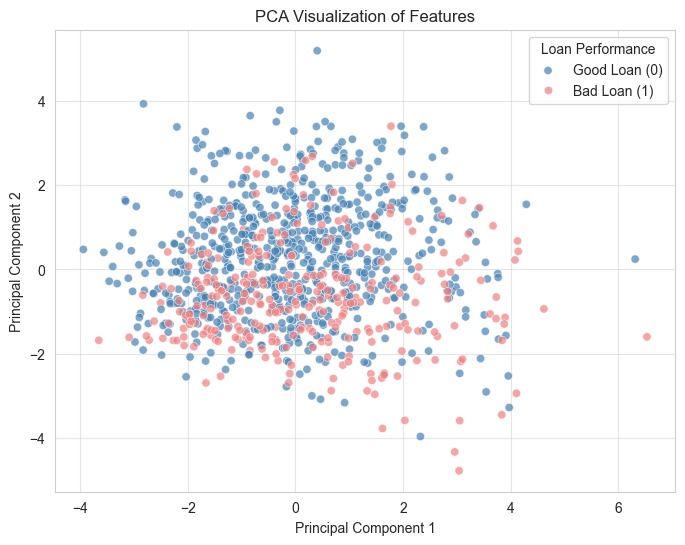

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x="PCA1",
    y="PCA2",
    hue="loan_performance",
    palette=["#f08080", "#4682b4"],
    alpha=0.7
)

plt.title("PCA Visualization of Features", fontsize=12)
plt.xlabel("Principal Component 1", fontsize=10)
plt.ylabel("Principal Component 2", fontsize=10)
plt.legend(title="Loan Performance", labels=["Good Loan (0)", "Bad Loan (1)"])
plt.grid(alpha=0.5)
plt.show()

Determining the explained variance and the total explained variance for the PCA components (PCA1 and PCA2)

In [36]:
explained_variance_ratio_pca = pca.explained_variance_ratio_
explained_variance_percentage_pca = np.round(explained_variance_ratio_pca * 100, 2)
total_explained_variance_pca = np.round((np.sum(explained_variance_ratio_pca) * 100), 2)

In [37]:
print(f"Explained Variance for PCA1: {explained_variance_percentage_pca[0]}%")
print(f"Explained Variance for PCA2: {explained_variance_percentage_pca[1]}%")
print(f"Total Explained Variance: {total_explained_variance_pca}%")

Explained Variance for PCA1: 12.68%
Explained Variance for PCA2: 9.84%
Total Explained Variance: 22.52%


#### t-Distributed Stochastic Neighbor Embedding (t-SNE) Visualization

In [38]:
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    max_iter=1000,
)
tsne_data = tsne.fit_transform(scaled_data)
tsne_df = pd.DataFrame(tsne_data, columns=["TSNE1", "TSNE2"])
tsne_df["loan_performance"] = df_renamed_copy["loan_performance"]

In [39]:
tsne_df

,TSNE1,TSNE2,loan_performance
0,-18.464397,-14.608900,1
1,-12.939054,32.951065,1
2,-25.095125,-6.246405,1
3,-53.309410,6.502383,1
4,-51.624149,7.338506,1
...,...,...,...
995,-16.624353,33.508400,0
996,-24.209948,15.065947,0
997,26.466898,-23.480040,0
998,3.398742,-21.255339,0


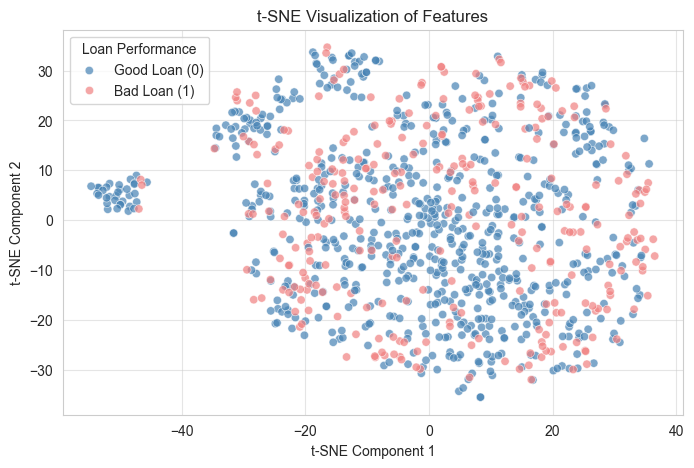

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=tsne_df,
    x="TSNE1",
    y="TSNE2",
    hue="loan_performance",
    palette=["#f08080", "#4682b4"],
    alpha=0.7
)

plt.title("t-SNE Visualization of Features", fontsize=12)
plt.xlabel("t-SNE Component 1", fontsize=10)
plt.ylabel("t-SNE Component 2", fontsize=10)
plt.legend(title="Loan Performance", labels=["Good Loan (0)", "Bad Loan (1)"])
plt.grid(alpha=0.5)
plt.show()

Determining the explained variance and the total explained variance for the PCA components (PCA1 and PCA2)

In [41]:
correlation_matrix = df_renamed_copy_dropped.corr()

In [42]:
df_renamed_copy_dropped

,account_type,duration_of_credit_in_months,payment_status_of_previous_credit,purpose,credit_amount,savings_type,length_of_current_employment,instalment_per_cent,marital_status,number_of_guarantors,duration_in_current_address,most_valuable_available_asset,age,number_of_concurrent_credits,apartment_type,number_of_credits_at_this_bank,occupation,number_of_dependents,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1


In [43]:
scaled_data_df = pd.DataFrame(scaled_data, columns=df_renamed_copy_dropped.columns)

Pearson's Correlation on processed dataset

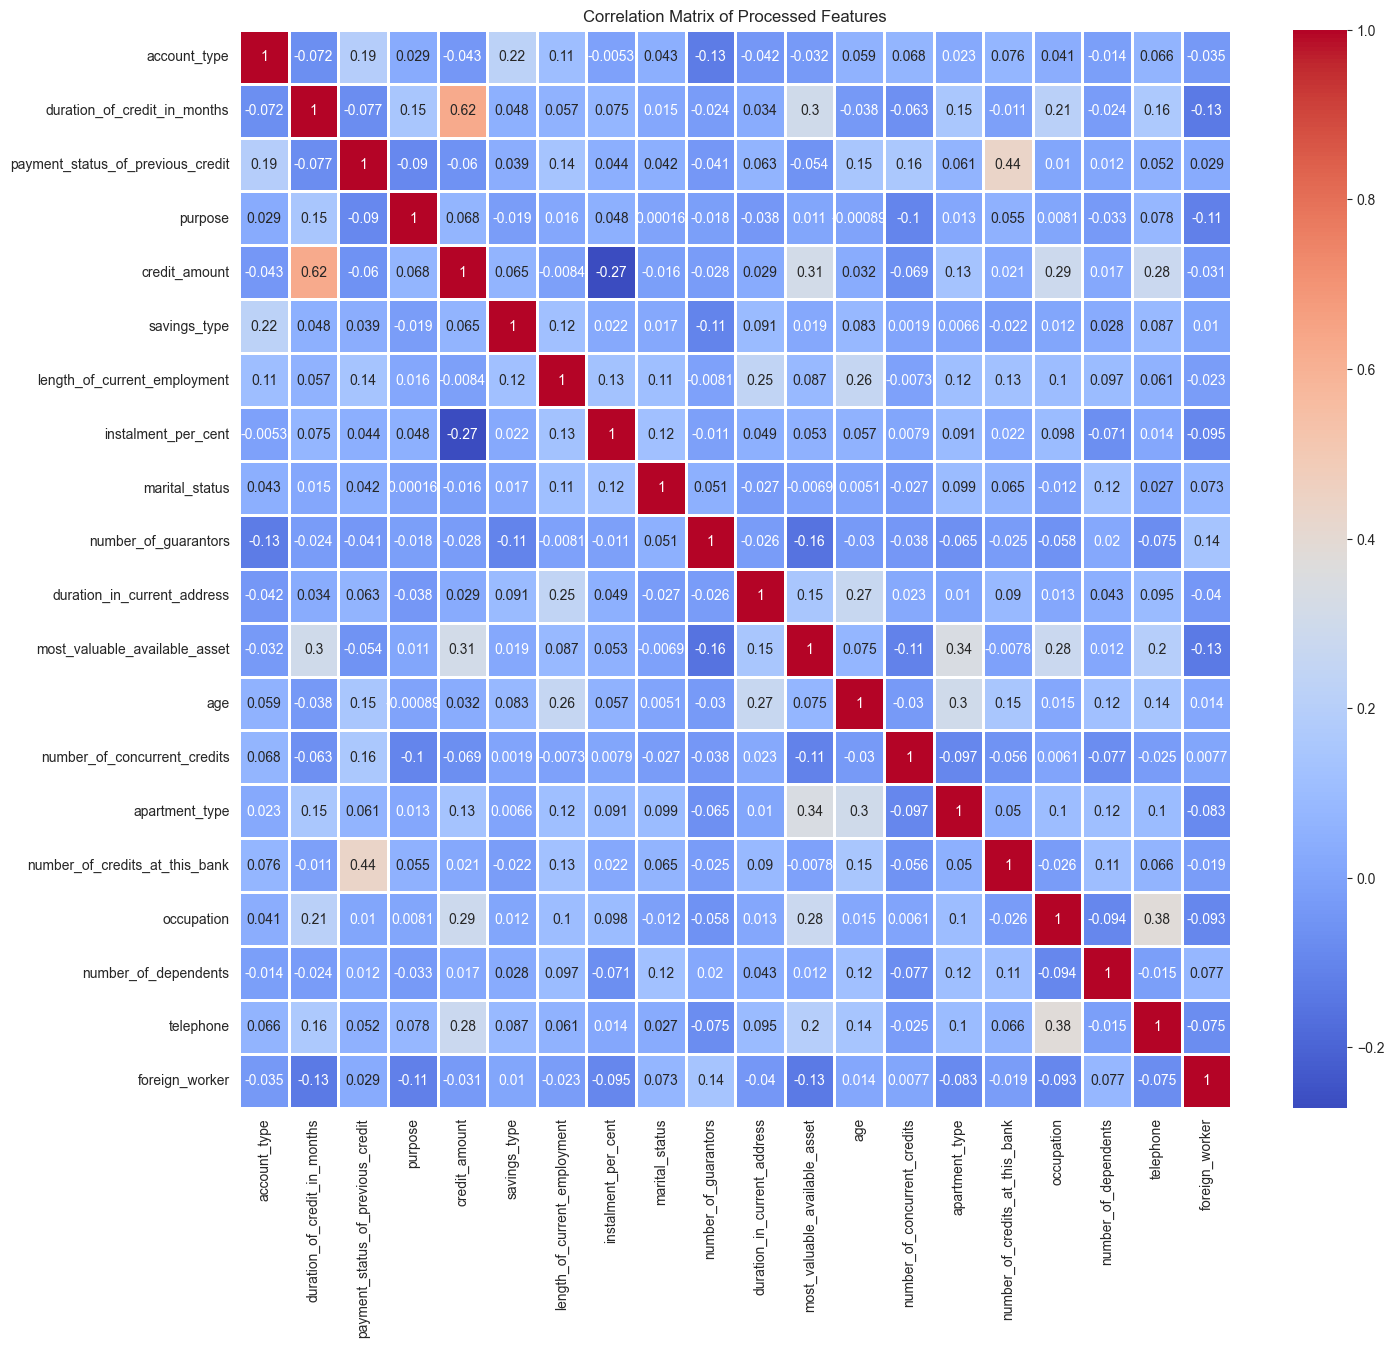

In [44]:
pearson_corr = scaled_data_df.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(pearson_corr, annot=True, linewidths=1, cmap="coolwarm")
plt.title('Correlation Matrix of Processed Features')
plt.show()

Spearman's Rank Correlation on the unprocessed dataset

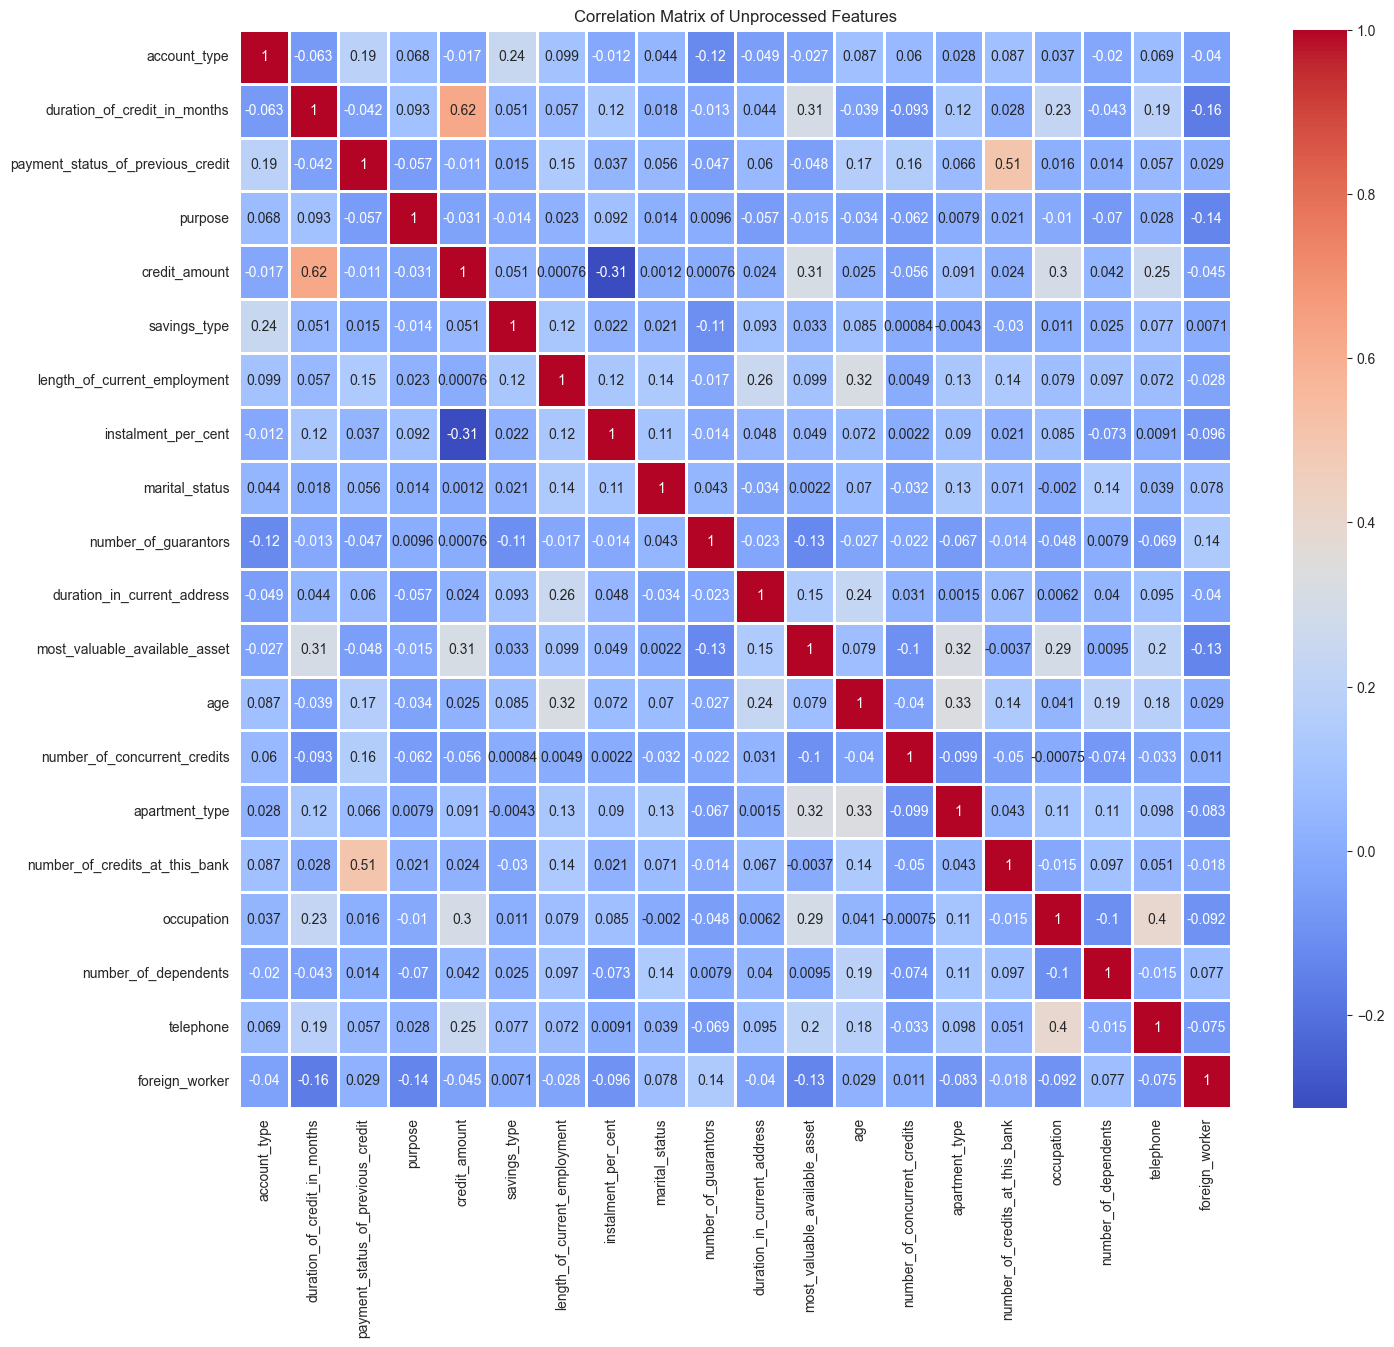

In [45]:
spearman_corr = df_renamed_copy_dropped.corr(method="spearman")
plt.figure(figsize=(16, 14))
sns.heatmap(spearman_corr, annot=True, linewidths=1, cmap="coolwarm")
plt.title('Correlation Matrix of Unprocessed Features')
plt.show()

Mutual Information Analysis

In [46]:
def mutual_info(
    df: pd.DataFrame,
    n_bins=10,
) -> pd.DataFrame:
    """
    Calculate the mutual information matrix for a given DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame for which to calculate the mutual information matrix.
    n_bins : int, optional
        The number of bins to use for discretizing the data, by default 10.

    Returns
    -------
    pd.DataFrame
        A DataFrame containing the mutual information scores between each pair of columns in the input DataFrame.
    """

    mi_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="uniform")
    df_discrete = pd.DataFrame(discretizer.fit_transform(df), columns=df.columns)

    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                mi_score = mutual_info_regression(
                    df_discrete[[col1]], df_discrete[col2]
                )
                mi_matrix.loc[col1, col2] = mi_score[0]
            else:
                mi_matrix.loc[col1, col2] = 0

    return mi_matrix

In [47]:
df_renamed_copy_dropped

,account_type,duration_of_credit_in_months,payment_status_of_previous_credit,purpose,credit_amount,savings_type,length_of_current_employment,instalment_per_cent,marital_status,number_of_guarantors,duration_in_current_address,most_valuable_available_asset,age,number_of_concurrent_credits,apartment_type,number_of_credits_at_this_bank,occupation,number_of_dependents,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1


In [48]:
processed_mi_matrix = mutual_info(scaled_data_df)
unprocessed_mi_matrix = mutual_info(df_renamed_copy_dropped)

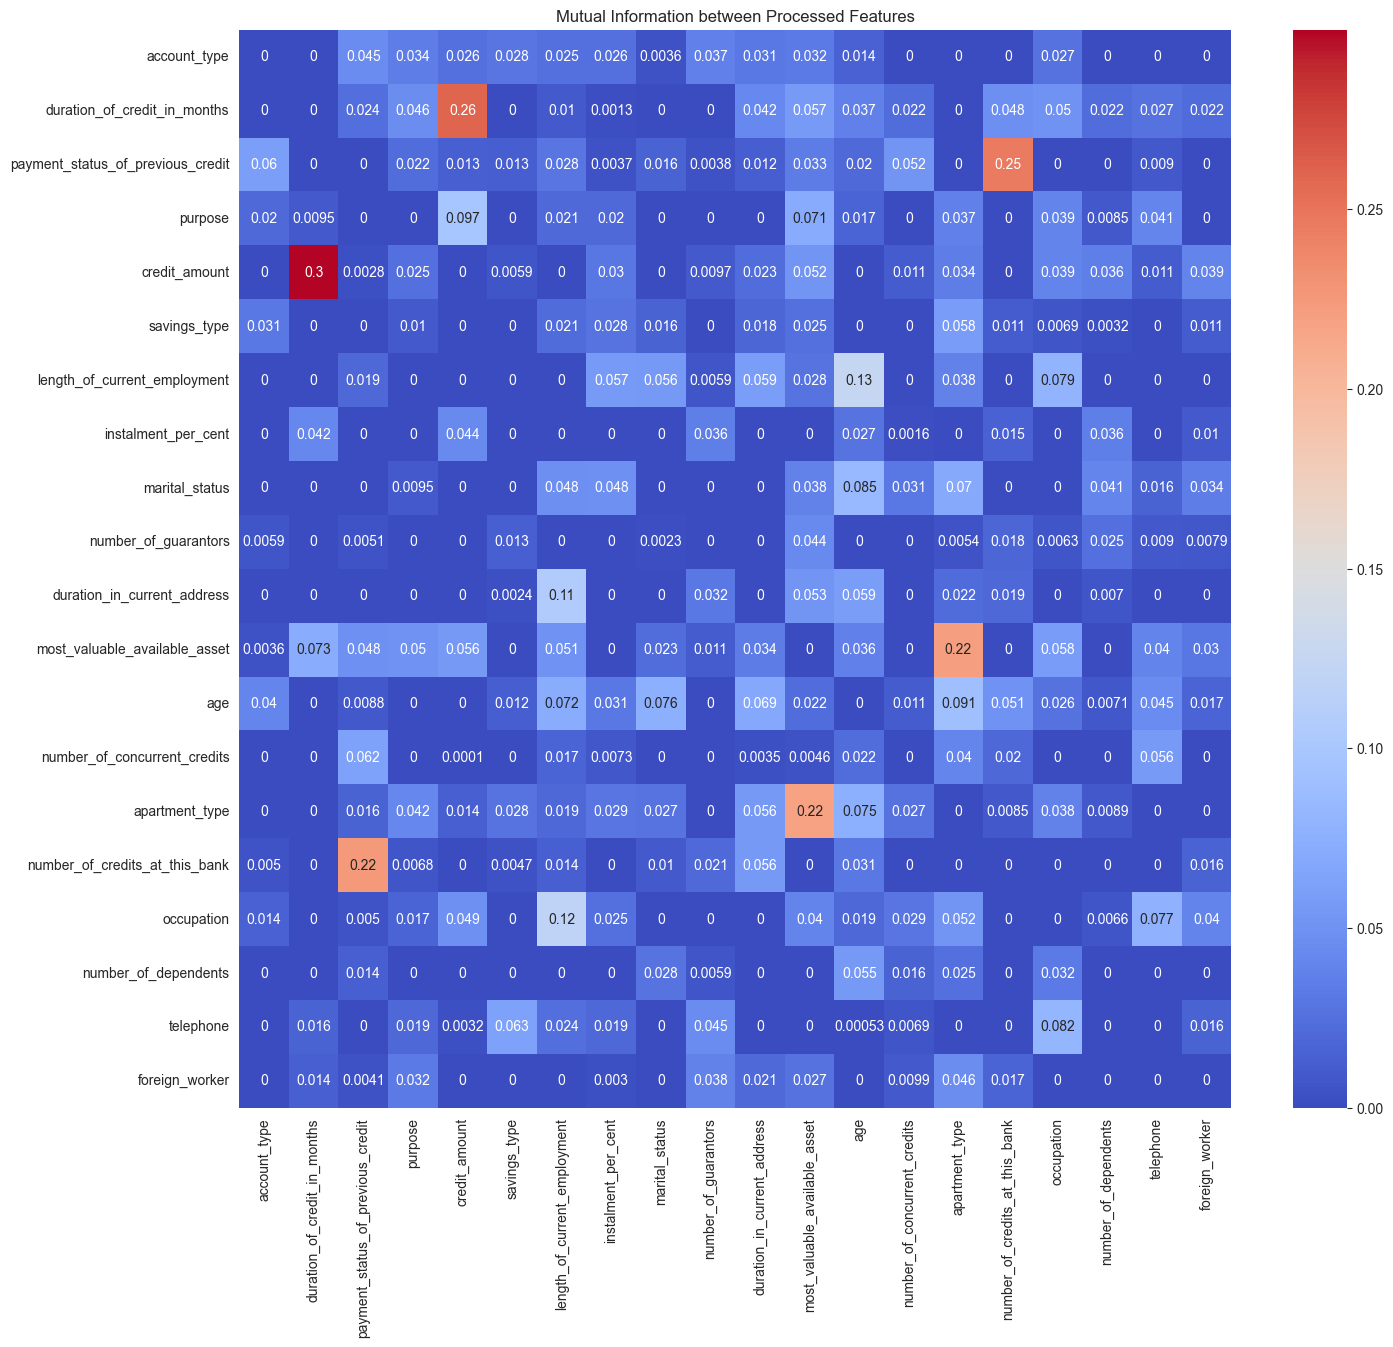

In [49]:
plt.figure(figsize=(16, 14))
sns.heatmap(processed_mi_matrix.astype(float), annot=True, cmap='coolwarm')
plt.title('Mutual Information between Processed Features')
plt.show()

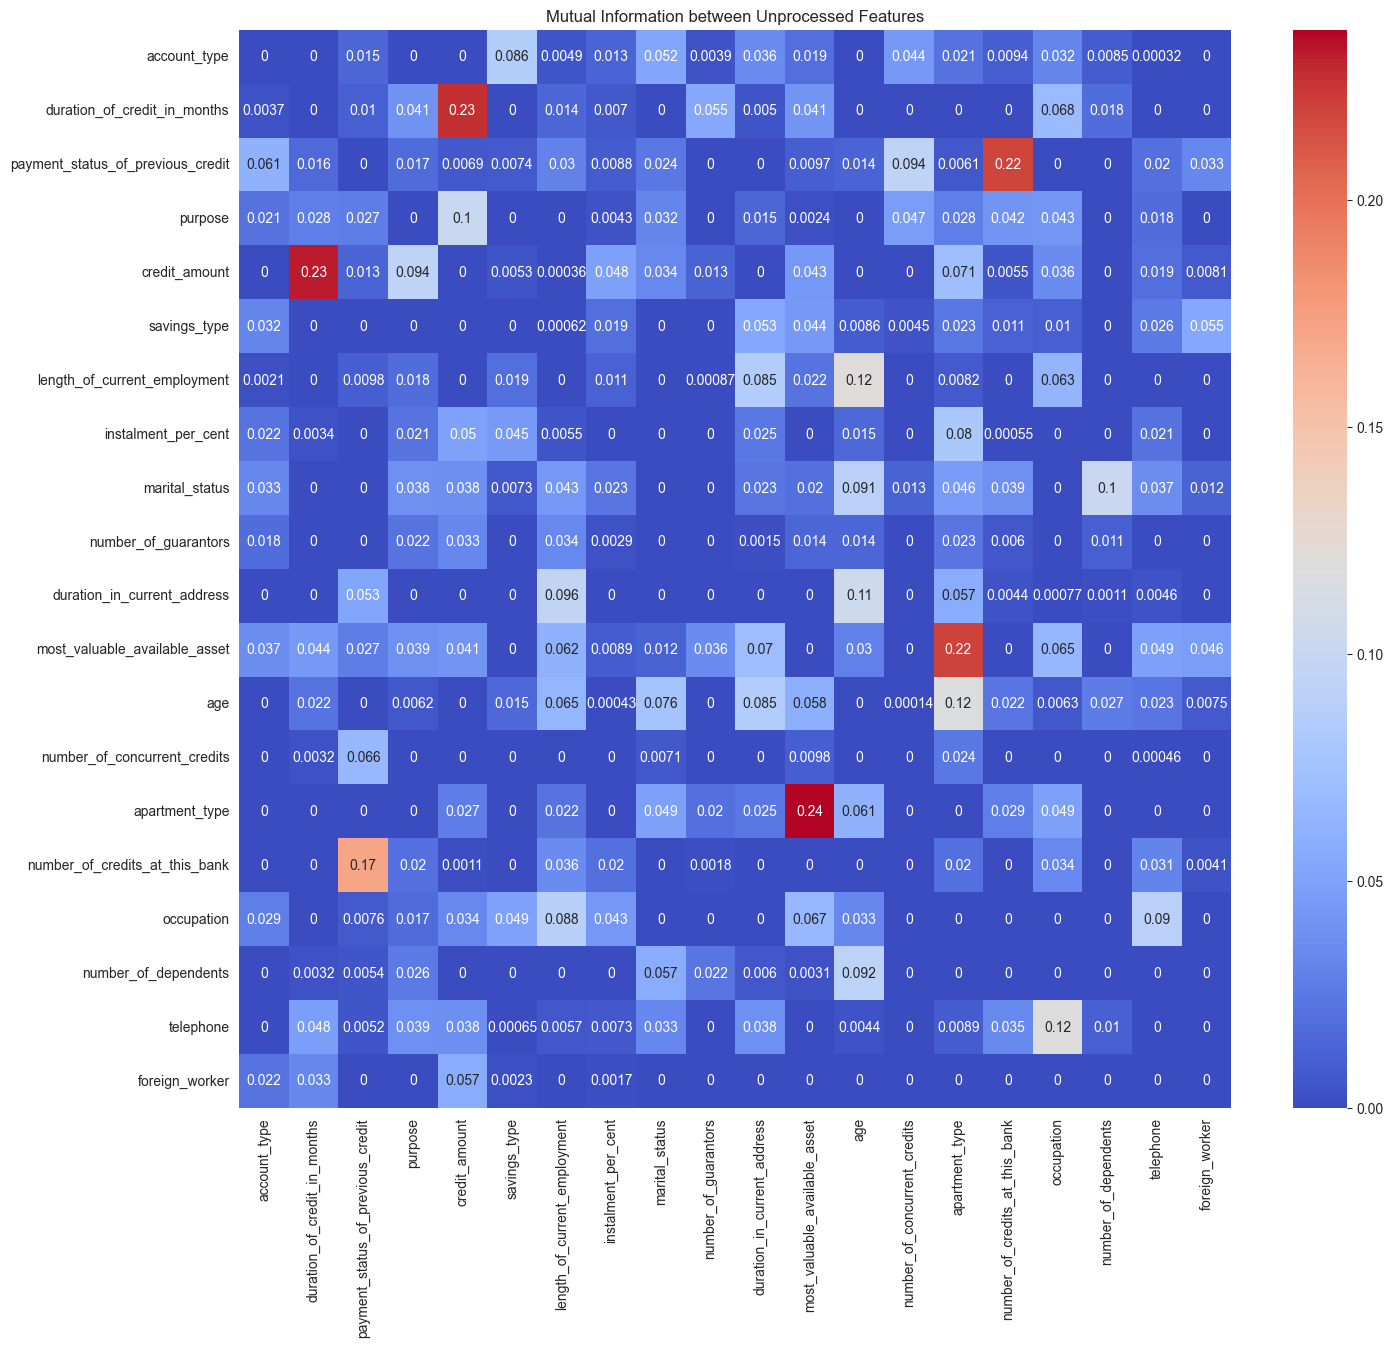

In [50]:
plt.figure(figsize=(16, 14))
sns.heatmap(unprocessed_mi_matrix.astype(float), annot=True, cmap='coolwarm')
plt.title('Mutual Information between Unprocessed Features')
plt.show()